In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
A = pd.read_csv("C:/Users/Baccchi/Downloads/Credit.csv")

In [3]:
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [4]:
cat.remove("Student")

In [5]:
B = A[con].join(pd.get_dummies(A[cat]))

In [6]:
B = B.drop(labels=["Unnamed: 0","ID"],axis=1)

In [7]:
B.head(3)

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_ Male,Gender_Female,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,333,1,0,0,1,0,0,1
1,106.025,6645,483,3,82,15,903,0,1,0,1,0,1,0
2,104.593,7075,514,4,71,11,580,1,0,1,0,0,1,0


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
A.Student = le.fit_transform(A.Student)

In [9]:
from sklearn.model_selection import train_test_split
X = B
Y = A[["Student"]]
xtrain,xtest,ytrain,ytest = train_test_split(X, Y, test_size = .20, random_state = 20)

In [10]:
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
predicted = model.predict(xtest)

C:\Users\Baccchi\anaconda3\envs\Machine_Learning_Class\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Baccchi\anaconda3\envs\Machine_Learning_Class\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,predicted)

array([[69,  1],
       [ 0, 10]], dtype=int64)

In [12]:
predicted

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [13]:
lr.predict_proba(xtest)

array([[9.83040777e-01, 1.69592230e-02],
       [1.54098956e-13, 1.00000000e+00],
       [9.99999999e-01, 1.12474272e-09],
       [1.00000000e+00, 1.18069001e-15],
       [1.64560150e-07, 9.99999835e-01],
       [1.00000000e+00, 2.64635726e-14],
       [9.99999990e-01, 9.69062247e-09],
       [1.00000000e+00, 7.81084183e-12],
       [1.00000000e+00, 1.91278599e-12],
       [1.00000000e+00, 1.61101018e-13],
       [1.00000000e+00, 1.40895775e-14],
       [1.00000000e+00, 2.80054537e-10],
       [9.99999994e-01, 5.91655794e-09],
       [9.99991041e-01, 8.95921297e-06],
       [2.22044605e-16, 1.00000000e+00],
       [1.00000000e+00, 1.82682038e-14],
       [1.00000000e+00, 5.87369699e-19],
       [1.00000000e+00, 5.85097547e-14],
       [1.00000000e+00, 3.39779364e-10],
       [9.99999760e-01, 2.40168892e-07],
       [1.99840144e-15, 1.00000000e+00],
       [1.00000000e+00, 2.13588179e-20],
       [1.00000000e+00, 5.73407374e-17],
       [1.00000000e+00, 4.07910806e-17],
       [1.000000

In [14]:
import sklearn.metrics as m
m.accuracy_score(ytest,predicted)

0.9875

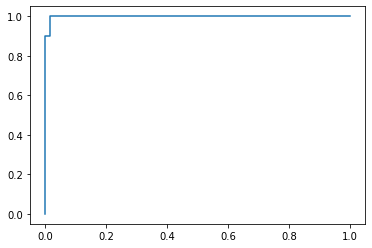

In [15]:
import sklearn.metrics as m
# calculate the fpr and tpr for all thresholds of the classification
probs = lr.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = m.roc_curve(ytest, preds)
roc_auc = m.auc(fpr, tpr)

import matplotlib.pyplot as plt 
plt.plot(fpr, tpr, roc_auc)